In [83]:
# -*- coding: utf-8 -*-

# Author: Xiaopeng Pan
# ID: 1129446
# Purpose: Assignment 2
# Date: July 24, 2020

# import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import sklearn packages 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# import keras package
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [85]:
# define a function to read csv and return a list of 2500 features and 1 true value
def extract_data(file_index):
    root_path = '/content/drive/My Drive/Colab Notebooks/DS/' 
    f=open(root_path+"data"+str(file_index)+".csv","r")
    optimized_value=f.readline()
    y_value=""
    for ch in optimized_value:
        if ch.isdigit():
            y_value=y_value+ch
        if ch==".":
            break
    y_value=int(y_value)
    X_value=f.read()
    f.close()
    X_value=X_value.replace('[','')
    X_value=X_value.replace(']','')
    X_value=X_value.split()
    dataset_list=[]
    for v in X_value:
        dataset_list.append(int(v))
    dataset_list.append(y_value)
    
    return dataset_list

In [86]:
# generate the dataset to be processed
dataset_row = extract_data(0)
my_dataset = pd.DataFrame(data=[dataset_row])
for file_index in range(1,1000):
    tmp_row = extract_data(file_index)
    tmp_dataset = pd.DataFrame(data=[tmp_row])
    my_dataset = pd.concat([my_dataset,tmp_dataset], ignore_index=True)
# show the first 5 rows of dataset
print(my_dataset.head())

   0     1     2     3     4     5     ...  2495  2496  2497  2498  2499  2500
0   156   499   284    25   300    40  ...   327    68   271   302    47  1606
1    84    46   272    52   329   217  ...   249   285   153   494   223  1714
2    68   400   158   354   390   469  ...   107   298   232   181   403  1936
3   400   148    24   118   468   343  ...   115    62   176   400   455  1811
4    28   281   161   226    67    77  ...   162   397    61   374   206  1890

[5 rows x 2501 columns]


**Task 1**  

Pre-process the dataset by properly loading the features/attributes and target variable into the training and testing part. Apply any feature scaling technique to scale the features before passing into the DL models.

In [87]:
# feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
my_dataset[list(range(2500))]=scaler.fit_transform(my_dataset[list(range(2500))])
# show the first 5 rows of dataset after feature scaling
print(my_dataset.head())

       0         1         2         3     ...      2497      2498      2499  2500
0  0.284519  1.000000  0.551148  0.010438  ...  0.524008  0.588727  0.056367  1606
1  0.133891  0.054280  0.526096  0.066806  ...  0.277662  0.989562  0.423800  1714
2  0.100418  0.793319  0.288100  0.697286  ...  0.442589  0.336117  0.799582  1936
3  0.794979  0.267223  0.008351  0.204593  ...  0.325678  0.793319  0.908142  1811
4  0.016736  0.544885  0.294363  0.430063  ...  0.085595  0.739040  0.388309  1890

[5 rows x 2501 columns]


In [88]:
# dataset splitting 
X = my_dataset[list(range(2500))].values
Y = my_dataset[2500].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=47)
# show each first row of the train and test datasets for both X and y after splitting
print("xTrain[0]=",xTrain[0])
print("xTest[0]=",xTest[0])
print("yTrain[0]=",yTrain[0])
print("yTest[0]=",yTest[0])

# assign the splitted dataset to ANN
xTrain_ANN = xTrain
xTest_ANN = xTest
yTrain_ANN = yTrain
yTest_ANN = yTest
# show each first row of the train and test datasets for both X and y after assigning datasets for ANN
print("xTrain_ANN[0]=",xTrain_ANN[0])
print("xTest_ANN[0]=",xTest_ANN[0])
print("yTrain_ANN[0]=",yTrain_ANN[0])
print("yTest_ANN[0]=",yTest_ANN[0])

# assign the splitted dataset to CNN
xTrain_CNN = xTrain.reshape(xTrain.shape[0],50,50,1)
xTest_CNN = xTest.reshape(xTest.shape[0],50,50,1)
yTrain_CNN = yTrain
yTest_CNN = yTest
# show each first row of the train and test datasets for both X and y after assigning datasets for CNN
print("xTrain_CNN[0]=",xTrain_CNN[0])
print("xTest_CNN[0]=",xTest_CNN[0])
print("yTrain_CNN[0]=",yTrain_CNN[0])
print("yTest_CNN[0]=",yTest_CNN[0])

xTrain[0]= [0.38702929 0.73695198 0.51983299 ... 0.28183716 0.47599165 0.9394572 ]
xTest[0]= [0.41841004 0.47599165 0.51356994 ... 0.66179541 0.92901879 0.29018789]
yTrain[0]= 1693
yTest[0]= 1736
xTrain_ANN[0]= [0.38702929 0.73695198 0.51983299 ... 0.28183716 0.47599165 0.9394572 ]
xTest_ANN[0]= [0.41841004 0.47599165 0.51356994 ... 0.66179541 0.92901879 0.29018789]
yTrain_ANN[0]= 1693
yTest_ANN[0]= 1736
xTrain_CNN[0]= [[[0.38702929]
  [0.73695198]
  [0.51983299]
  ...
  [0.43841336]
  [0.55114823]
  [0.40292276]]

 [[0.35281837]
  [0.30897704]
  [0.94572025]
  ...
  [0.59205021]
  [0.88100209]
  [0.58455115]]

 [[0.03757829]
  [0.57861635]
  [0.28183716]
  ...
  [0.91823899]
  [0.22964509]
  [0.1440501 ]]

 ...

 [[0.54488518]
  [0.23689727]
  [0.20668058]
  ...
  [0.08158996]
  [0.70920502]
  [0.35073069]]

 [[0.0480167 ]
  [0.05427975]
  [0.782881  ]
  ...
  [0.74686192]
  [0.21294363]
  [0.28601253]]

 [[0.37866109]
  [0.35490605]
  [0.60751566]
  ...
  [0.28183716]
  [0.47599165]


In [90]:
# define the function to get the performance metrics between the true values and predictions
def get_performance_metrics(test, pred):
    mse = mean_squared_error(test, pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test, pred)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    return rmse, mae

In [91]:
# display the function to draw the true vs prediction graph
def chart_true_vs_prediction(pred, y, m_type):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    
    plt.plot(t['y'].tolist(),label='True')
    plt.plot(t['pred'].tolist(),label='Prediction')
    plt.title('True vs Prediction of %s'%(m_type))
    plt.xlabel('Tested dataset')
    plt.ylabel('output')
    plt.legend()
    plt.show()

**Task 2**  

Design an Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN) structure to predict the optimized value. Train the models using a cross-validation technique.

In [92]:
# define the function to get the model for ANN
def get_model_ann():
    model = Sequential()
    model.add(Dense(100, input_dim = xTrain_ANN.shape[1], activation='relu'))
    model.add(Dense(75, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    return model

model_ann = get_model_ann()

In [93]:
# Train the ANN model with Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(xTrain_ANN, yTrain_ANN)
foldNum=0
for train_index, val_index in skf.split(xTrain_ANN, yTrain_ANN):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    history = model_ann.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=200, 
                        batch_size=1)  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Results for fold 1
Epoch 1/200
640/640 [==============================] - 2s 2ms/step - loss: 148926.1719 - val_loss: 6982.7163
Epoch 2/200
640/640 [==============================] - 1s 2ms/step - loss: 10189.7871 - val_loss: 7076.6431
Epoch 3/200
640/640 [==============================] - 1s 2ms/step - loss: 8994.8916 - val_loss: 7661.0327
Epoch 4/200
640/640 [==============================] - 1s 2ms/step - loss: 7864.2656 - val_loss: 8220.0137
Epoch 5/200
640/640 [==============================] - 1s 2ms/step - loss: 7119.0947 - val_loss: 23075.7227
Epoch 6/200
640/640 [==============================] - 1s 2ms/step - loss: 6431.7339 - val_loss: 12795.9453
Epoch 7/200
640/640 [==============================] - 1s 2ms/step - loss: 5705.3062 - val_loss: 13454.1934
Epoch 8/200
640/640 [==============================] - 1s 2ms/step - loss: 5087.0044 - val_loss: 7794.2939
Epoch 9/200
640/640 [==============================] - 1s 2ms/step - loss: 4345.3672 - val_loss: 13280.9189
Epoch 10/20

In [94]:
# define the function to get the model for CNN
def get_model_cnn():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    return model

model_cnn = get_model_cnn()

In [95]:
# Train the CNN model with Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(xTrain_CNN, yTrain_CNN)
foldNum=0
for train_index, val_index in skf.split(xTrain_CNN, yTrain_CNN):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X.reshape(X.shape[0],50,50,1)[train_index], X.reshape(X.shape[0],50,50,1)[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    history = model_cnn.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=200,
                        batch_size=1)  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Results for fold 1
Epoch 1/200
640/640 [==============================] - 2s 3ms/step - loss: 53389.8555 - val_loss: 12310.2637
Epoch 2/200
640/640 [==============================] - 2s 3ms/step - loss: 18353.9238 - val_loss: 23882.8594
Epoch 3/200
640/640 [==============================] - 2s 3ms/step - loss: 17136.3320 - val_loss: 15218.0723
Epoch 4/200
640/640 [==============================] - 2s 3ms/step - loss: 16506.9727 - val_loss: 24094.6855
Epoch 5/200
640/640 [==============================] - 2s 3ms/step - loss: 15816.5830 - val_loss: 30931.2383
Epoch 6/200
640/640 [==============================] - 2s 3ms/step - loss: 14457.1719 - val_loss: 14192.2109
Epoch 7/200
640/640 [==============================] - 2s 3ms/step - loss: 14257.8262 - val_loss: 14151.3643
Epoch 8/200
640/640 [==============================] - 2s 3ms/step - loss: 12925.8730 - val_loss: 28852.5098
Epoch 9/200
640/640 [==============================] - 2s 3ms/step - loss: 13430.0059 - val_loss: 11452.5342


**Task 3**  

After training the models, save the trained models using a file named "Student-ID-ANN.h5" and "Student-ID-CNN.h5". Load the trained models from the saved files to predict the optimized value for the test data.

In [96]:
# save the trained ANN model 
model_ann.save("Xiaopeng Pan_1129446_ANN.h5")

# save the trained CNN model 
model_cnn.save("Xiaopeng Pan_1129446_CNN.h5")

# load the trained ANN model and predict the test data
model_ann_loaded = tf.keras.models.load_model('Xiaopeng Pan_1129446_ANN.h5')
yPredict_ANN = model_ann_loaded.predict(xTest_ANN)

# print 8 predicted and true values by ANN model
print("Examples of ANN: ")
print("Prediction: ", yPredict_ANN.reshape(-1)[:8].astype(int))
print("True: ", yTest_ANN[:8])

# load the trained CNN model and predict the test data
model_cnn_loaded = tf.keras.models.load_model('Xiaopeng Pan_1129446_CNN.h5')
yPredict_CNN = model_cnn_loaded.predict(xTest_CNN)

# print 8 predicted and true values by CNN model
print("Examples of CNN: ")
print("Prediction: ", yPredict_CNN.reshape(-1)[:8].astype(int))
print("True: ", yTest_CNN[:8])

Examples of ANN: 
Prediction:  [1737 1797 1590 1798 1663 1770 1600 1765]
True:  [1736 1864 1583 1799 1656 1765 1594 1789]
Examples of CNN: 
Prediction:  [1697 1706 1571 1769 1615 1732 1561 1762]
True:  [1736 1864 1583 1799 1656 1765 1594 1789]


**Task 4**  

Visual predictive performance: Display the True vs. Prediction graph for both ANN and CNN models (one graph for each model).

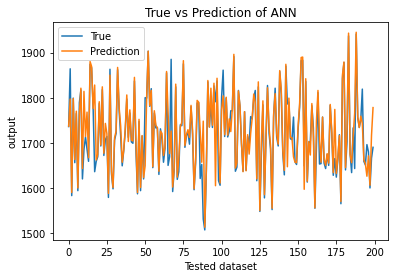

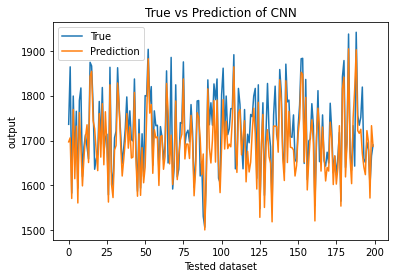

In [97]:
# plot true vs prediction graph for ANN model
chart_true_vs_prediction(yPredict_ANN.astype(int).flatten(),yTest_ANN,"ANN")

# plot true vs prediction graph for CNN model
chart_true_vs_prediction(yPredict_CNN.astype(int).flatten(),yTest_CNN,"CNN")

**Task 5**  

Compare both models' prediction performance (ANN and CNN) using appropriate performance metrics.

RMSE:  41.00259959838907
MAE:  19.187554321289063
RMSE:  49.40986173757467
MAE:  37.287169189453124
0.0
1.0


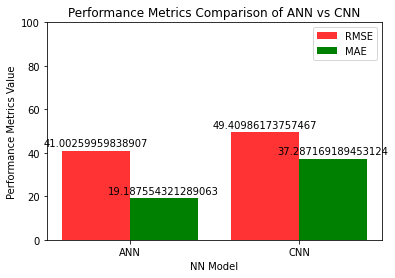

In [125]:
# get performance metrics for ANN
rmse_ann, mae_ann = get_performance_metrics(yTest_ANN, yPredict_ANN)

# get performance metrics for CNN
rmse_cnn, mae_cnn = get_performance_metrics(yTest_CNN, yPredict_CNN)

# compare both models' prediction performance for ANN and CNN
label_list = ['ANN', 'CNN']
rmse_list = [rmse_ann, rmse_cnn]
mae_list = [mae_ann, mae_cnn]

x_index = range(len(rmse_list))
rmse_rect = plt.bar(x=x_index, height=rmse_list, width=0.4, alpha=0.8,color='red',label="RMSE")
mae_rect = plt.bar(x=[i+0.4 for i in x_index], height=mae_list, width=0.4, color='green',label="MAE")

plt.ylim(0,100)
plt.ylabel("Performance Metrics Value")
plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("NN Model")
plt.title("Performance Metrics Comparison of ANN vs CNN")
plt.legend()

for rect in rmse_rect:
    height = rect.get_height()
    width = rect.get_x() + rect.get_width() / 2
    print(width)
    plt.text(width, height+1, str(height), ha="center", va="bottom")
for rect in mae_rect:
    height = rect.get_height()
    width = rect.get_x() + rect.get_width() / 2
    plt.text(width, height+1, str(height), ha="center", va="bottom")
plt.show()